In [1]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import Imputer
from sklearn.manifold import TSNE
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale

from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2



import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('pastel')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})

%matplotlib inline

In [2]:
df = pd.read_csv('SOMv3_Master_201612.csv', nrows=100)

In [3]:
df.head()

,new_cust_n,CUST_TIME_WITH_BANK,CUST_STAFF_FLAG,CUST_CREDIT_BUREAU_SCORE_Min,CUST_AGE_OF_CUSTOMER,CUST_CRG_2_MONTHS_AGO_Mean,CUST_TOTAL_EXP_MTHLY_INCOM_Sum,CUST_TOTAL_INTEREST_INCOME_Sum,CUST_TOT_FEE_INCOME_Sum,CA_CURRENT_DAYS_IN_EXCESS_Max,...,NonSB_HL_Num,SB_VAF_Num,NonSB_VAF_Num,NonSB_Insurance_Num,Unsecured_Secured_Ratio,SB_NonSB_TotalRatio,SB_NonSB_unsecured_Ratio,SB_NonSB_Secured_Ratio,Prod_VAF,Prod_Credit_Card
0,180,361,0,0,75,99.0,0,0.00,0.0,NaN,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0,0
1,195,405,0,0,60,4.5,0,1262.27,98.9,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1
2,202,389,0,0,54,99.0,0,0.00,1021.0,NaN,...,0.0,0.0,3.0,0.0,0.013114,0.0,0.0,0.0,0,0
3,212,181,0,0,58,6.0,0,0.00,121.3,0.0,...,0.0,0.0,0.0,1.0,NaN,0.0,0.0,NaN,0,0
4,213,422,0,0,83,3.0,0,935.80,175.4,0.0,...,1.0,0.0,1.0,2.0,NaN,NaN,NaN,NaN,0,1


In [4]:
df.dtypes

new_cust_n                          int64
CUST_TIME_WITH_BANK                 int64
CUST_STAFF_FLAG                     int64
CUST_CREDIT_BUREAU_SCORE_Min        int64
CUST_AGE_OF_CUSTOMER                int64
CUST_CRG_2_MONTHS_AGO_Mean        float64
CUST_TOTAL_EXP_MTHLY_INCOM_Sum      int64
CUST_TOTAL_INTEREST_INCOME_Sum    float64
CUST_TOT_FEE_INCOME_Sum           float64
CA_CURRENT_DAYS_IN_EXCESS_Max     float64
CA_DAYS_IN_DEBIT_L3M_Max          float64
CA_DAYS_IN_DEBIT_L6M_Max          float64
CA_DAYS_IN_EXCESS_L3M_Max         float64
CA_DAYS_IN_EXCESS_L6M_Max         float64
CA_MIN_BAL_L3M_L6M_PERCENT_Max    float64
CA_MINBAL_L3M_TO_MINBAL_L1_Max    float64
CA_MNTH_SIN_ACCT_OPEN_Max         float64
CA_MNTH_SIN_LAST_ACTIVE_Max       float64
CA_MNTH_SIN_LAST_LIM_CHN_Max      float64
CA_ODRFT_UTI_PER_MINBAL_L1_Max    float64
CA_DELPHI_SCORE_Max               float64
CA_MIN_BAL_L3M_L6M_PERCENT_Min    float64
CA_MINBAL_L3M_TO_MINBAL_L1_Min    float64
CA_MNTH_SIN_ACCT_OPEN_Min         

In [5]:
df.shape

(100, 184)

In [6]:
npa = df.values

In [7]:
npa.shape

(100, 184)

In [8]:
df1 = df._get_numeric_data()

In [9]:
df1.describe(percentiles=[0.01, 0.025, 0.05, 0.10, 0.25, 0.5, 0.75, 0.90, 0.95, 0.975, 0.99]).to_csv('stats.csv')

In [10]:
df1.describe(percentiles=[0.01, 0.025, 0.05, 0.10, 0.25, 0.5, 0.75, 0.90, 0.95, 0.975, 0.99])

,new_cust_n,CUST_TIME_WITH_BANK,CUST_STAFF_FLAG,CUST_CREDIT_BUREAU_SCORE_Min,CUST_AGE_OF_CUSTOMER,CUST_CRG_2_MONTHS_AGO_Mean,CUST_TOTAL_EXP_MTHLY_INCOM_Sum,CUST_TOTAL_INTEREST_INCOME_Sum,CUST_TOT_FEE_INCOME_Sum,CA_CURRENT_DAYS_IN_EXCESS_Max,...,NonSB_HL_Num,SB_VAF_Num,NonSB_VAF_Num,NonSB_Insurance_Num,Unsecured_Secured_Ratio,SB_NonSB_TotalRatio,SB_NonSB_unsecured_Ratio,SB_NonSB_Secured_Ratio,Prod_VAF,Prod_Credit_Card
count,100.000000,100.0000,100.00,100.0,100.000000,100.000000,100.0,100.00000,100.000000,56.000000,...,76.000000,76.000000,76.000000,76.000000,15.000000,40.000000,38.000000,11.000000,100.000000,100.000000
mean,668.460000,330.9500,0.01,0.0,66.940000,35.050000,0.0,607.89350,4892.394200,0.517857,...,0.157895,0.092105,0.289474,0.750000,0.664179,9.219932,9.505012,4.255899,0.030000,0.470000
std,260.135568,117.5098,0.10,0.0,13.488356,43.647029,0.0,2437.16216,44967.136104,3.741614,...,0.401751,0.494709,0.649426,0.994987,1.525728,38.935988,39.971171,9.057388,0.171447,0.501614
min,180.000000,46.0000,0.00,0.0,29.000000,0.000000,0.0,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1%,194.850000,61.8400,0.00,0.0,38.900000,0.000000,0.0,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2.5%,206.750000,62.9500,0.00,0.0,39.475000,1.000000,0.0,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5%,214.900000,108.4500,0.00,0.0,43.850000,2.950000,0.0,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10%,266.600000,138.8000,0.00,0.0,49.900000,3.000000,0.0,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,500.500000,247.0000,0.00,0.0,57.750000,3.000000,0.0,0.00000,45.075000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.013009,0.000000,0.000000,0.000000,0.000000,0.000000
50%,671.500000,377.0000,0.00,0.0,69.500000,7.000000,0.0,0.00000,125.150000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.099589,0.000000,0.000000,0.000000,0.000000,0.000000


In [11]:
df1.shape[0] - df1.dropna().shape[0]

100

In [12]:
npa = df1.values

In [13]:
npa.dtype

dtype('float64')

In [14]:
check=df1[df1.new_cust_n==195]

In [15]:
check

,new_cust_n,CUST_TIME_WITH_BANK,CUST_STAFF_FLAG,CUST_CREDIT_BUREAU_SCORE_Min,CUST_AGE_OF_CUSTOMER,CUST_CRG_2_MONTHS_AGO_Mean,CUST_TOTAL_EXP_MTHLY_INCOM_Sum,CUST_TOTAL_INTEREST_INCOME_Sum,CUST_TOT_FEE_INCOME_Sum,CA_CURRENT_DAYS_IN_EXCESS_Max,...,NonSB_HL_Num,SB_VAF_Num,NonSB_VAF_Num,NonSB_Insurance_Num,Unsecured_Secured_Ratio,SB_NonSB_TotalRatio,SB_NonSB_unsecured_Ratio,SB_NonSB_Secured_Ratio,Prod_VAF,Prod_Credit_Card
1,195,405,0,0,60,4.5,0,1262.27,98.9,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1


In [43]:
df1.isnull().any()

new_cust_n                        False
CUST_TIME_WITH_BANK               False
CUST_STAFF_FLAG                   False
CUST_CREDIT_BUREAU_SCORE_Min      False
CUST_AGE_OF_CUSTOMER              False
CUST_CRG_2_MONTHS_AGO_Mean        False
CUST_TOTAL_EXP_MTHLY_INCOM_Sum    False
CUST_TOTAL_INTEREST_INCOME_Sum    False
CUST_TOT_FEE_INCOME_Sum           False
CA_CURRENT_DAYS_IN_EXCESS_Max      True
CA_DAYS_IN_DEBIT_L3M_Max           True
CA_DAYS_IN_DEBIT_L6M_Max           True
CA_DAYS_IN_EXCESS_L3M_Max          True
CA_DAYS_IN_EXCESS_L6M_Max          True
CA_MIN_BAL_L3M_L6M_PERCENT_Max     True
CA_MINBAL_L3M_TO_MINBAL_L1_Max     True
CA_MNTH_SIN_ACCT_OPEN_Max          True
CA_MNTH_SIN_LAST_ACTIVE_Max        True
CA_MNTH_SIN_LAST_LIM_CHN_Max       True
CA_ODRFT_UTI_PER_MINBAL_L1_Max     True
CA_DELPHI_SCORE_Max                True
CA_MIN_BAL_L3M_L6M_PERCENT_Min     True
CA_MINBAL_L3M_TO_MINBAL_L1_Min     True
CA_MNTH_SIN_ACCT_OPEN_Min          True
CA_MNTH_SIN_LAST_ACTIVE_Min        True


### Need to still replace outlier values with 1% and 99% cap
look at interquartile range element

In [17]:
# create a new dataframe called df3
# this dataframe has all the missing values replaced by the mean of the column in questions
# create an empty dataframe called df3 to populated with scaled, numeric values only from df2

df3 = pd.DataFrame()

for column in df1:
    try:
        mean_c = df1[column].mean()
        stdev_c = df1[column].std()
        
        df2 =  df1[column].fillna(mean_c)
        df3 = pd.concat([ 
            pd.DataFrame(df3),
            pd.DataFrame(df2, columns=[column])], axis=1)
        print("Mean for " + column + " " + str(mean_c)  +" : "+ "Standard devation for " + column + " " + str(stdev_c))
    except ValueError:
        print(column + " is not compatible")

Mean for new_cust_n 668.46 : Standard devation for new_cust_n 260.1355676091863
Mean for CUST_TIME_WITH_BANK 330.95 : Standard devation for CUST_TIME_WITH_BANK 117.50979972029151
Mean for CUST_STAFF_FLAG 0.01 : Standard devation for CUST_STAFF_FLAG 0.09999999999999999
Mean for CUST_CREDIT_BUREAU_SCORE_Min 0.0 : Standard devation for CUST_CREDIT_BUREAU_SCORE_Min 0.0
Mean for CUST_AGE_OF_CUSTOMER 66.94 : Standard devation for CUST_AGE_OF_CUSTOMER 13.488356370431411
Mean for CUST_CRG_2_MONTHS_AGO_Mean 35.05 : Standard devation for CUST_CRG_2_MONTHS_AGO_Mean 43.64702889445205
Mean for CUST_TOTAL_EXP_MTHLY_INCOM_Sum 0.0 : Standard devation for CUST_TOTAL_EXP_MTHLY_INCOM_Sum 0.0
Mean for CUST_TOTAL_INTEREST_INCOME_Sum 607.8935000000001 : Standard devation for CUST_TOTAL_INTEREST_INCOME_Sum 2437.1621602582572
Mean for CUST_TOT_FEE_INCOME_Sum 4892.394200000001 : Standard devation for CUST_TOT_FEE_INCOME_Sum 44967.136104426994
Mean for CA_CURRENT_DAYS_IN_EXCESS_Max 0.5178571428571429 : Standard

In [44]:
df3.isnull().any()

new_cust_n                        False
CUST_TIME_WITH_BANK               False
CUST_STAFF_FLAG                   False
CUST_CREDIT_BUREAU_SCORE_Min      False
CUST_AGE_OF_CUSTOMER              False
CUST_CRG_2_MONTHS_AGO_Mean        False
CUST_TOTAL_EXP_MTHLY_INCOM_Sum    False
CUST_TOTAL_INTEREST_INCOME_Sum    False
CUST_TOT_FEE_INCOME_Sum           False
CA_CURRENT_DAYS_IN_EXCESS_Max     False
CA_DAYS_IN_DEBIT_L3M_Max          False
CA_DAYS_IN_DEBIT_L6M_Max          False
CA_DAYS_IN_EXCESS_L3M_Max         False
CA_DAYS_IN_EXCESS_L6M_Max         False
CA_MIN_BAL_L3M_L6M_PERCENT_Max    False
CA_MINBAL_L3M_TO_MINBAL_L1_Max    False
CA_MNTH_SIN_ACCT_OPEN_Max         False
CA_MNTH_SIN_LAST_ACTIVE_Max       False
CA_MNTH_SIN_LAST_LIM_CHN_Max      False
CA_ODRFT_UTI_PER_MINBAL_L1_Max    False
CA_DELPHI_SCORE_Max               False
CA_MIN_BAL_L3M_L6M_PERCENT_Min    False
CA_MINBAL_L3M_TO_MINBAL_L1_Min    False
CA_MNTH_SIN_ACCT_OPEN_Min         False
CA_MNTH_SIN_LAST_ACTIVE_Min       False


In [19]:
check=df3[df3.new_cust_n==195]

In [20]:
check

,new_cust_n,CUST_TIME_WITH_BANK,CUST_STAFF_FLAG,CUST_CREDIT_BUREAU_SCORE_Min,CUST_AGE_OF_CUSTOMER,CUST_CRG_2_MONTHS_AGO_Mean,CUST_TOTAL_EXP_MTHLY_INCOM_Sum,CUST_TOTAL_INTEREST_INCOME_Sum,CUST_TOT_FEE_INCOME_Sum,CA_CURRENT_DAYS_IN_EXCESS_Max,...,NonSB_HL_Num,SB_VAF_Num,NonSB_VAF_Num,NonSB_Insurance_Num,Unsecured_Secured_Ratio,SB_NonSB_TotalRatio,SB_NonSB_unsecured_Ratio,SB_NonSB_Secured_Ratio,Prod_VAF,Prod_Credit_Card
1,195,405,0,0,60,4.5,0,1262.27,98.9,0.0,...,0.157895,0.092105,0.289474,0.75,0.664179,9.219932,9.505012,4.255899,0,1


In [21]:
# convert to numppy array
npa_data = df3.values

In [22]:
#scale the data and covert it to mean 0 and std 1
npa_scaled = scale(npa_data)

In [23]:
df3_scaled = pd.DataFrame(scale(df3),columns = df3.columns) 

In [24]:
npa_scaled.shape

(100, 180)

In [25]:
df3_scaled['CUST_AGE_OF_CUSTOMER'].mean()
df3_scaled['CUST_AGE_OF_CUSTOMER'].std()

1.005037815259212

In [26]:
# must do it in two steps to get the pca_mod.components_ value later on
pca_mod = PCA(n_components=44)
pca_mod.fit_transform(df3_scaled)

array([[ -5.72338768e-01,   9.72818439e-02,   1.87005137e-02, ...,
          2.36627198e-01,  -1.10227237e-02,  -3.47066576e-02],
       [ -2.51934196e+00,  -1.36903845e-01,  -1.55377769e+00, ...,
          1.71263146e+00,   1.10327800e+00,   7.21949743e-02],
       [ -5.32684121e-01,  -1.28452519e+00,   5.26095823e-01, ...,
          5.14902218e-01,  -4.76968120e-01,  -1.59114092e+00],
       ..., 
       [ -1.16487831e+00,  -6.08256854e-01,  -9.34894691e-01, ...,
          6.70877020e-01,  -3.10192514e-01,  -4.19303970e-01],
       [ -2.15290782e-01,  -2.78998784e-02,   1.63233216e-01, ...,
         -4.85472149e-02,  -7.94714848e-01,  -2.73826004e-01],
       [ -2.94378748e+00,   3.93866903e+00,  -5.79045013e+00, ...,
          4.17056713e-03,  -1.62436667e-01,  -2.54145850e-01]])

In [27]:
#The amount of variance that each PC explains
var0 = pca_mod.explained_variance_ 
var1 = pca_mod.explained_variance_ratio_

In [28]:
#Cumulative Variance explains
var2=np.cumsum(np.round(pca_mod.explained_variance_ratio_, decimals=4)*100)

In [29]:
var0

array([ 27.76212941,  13.49419606,  10.92807882,   8.66809069,
         7.73063982,   7.4739166 ,   6.08114065,   5.85493297,
         4.96785467,   4.58959082,   4.25456199,   4.01525685,
         3.67492869,   3.64187457,   3.57800324,   3.27325698,
         3.08281765,   2.81154748,   2.75257551,   2.56882803,
         2.46458861,   2.3722256 ,   2.3261049 ,   2.18513413,
         2.04186361,   1.92761709,   1.78010116,   1.65246306,
         1.61269259,   1.57738796,   1.36669039,   1.30101157,
         1.21266445,   1.0590701 ,   0.98765531,   0.95240647,
         0.88784433,   0.84813232,   0.81045833,   0.77070439,
         0.70142964,   0.66377103,   0.60815272,   0.600423  ])

In [30]:
var2

array([ 16.24,  24.13,  30.52,  35.59,  40.11,  44.48,  48.04,  51.46,
        54.37,  57.05,  59.54,  61.89,  64.04,  66.17,  68.26,  70.17,
        71.97,  73.61,  75.22,  76.72,  78.16,  79.55,  80.91,  82.19,
        83.38,  84.51,  85.55,  86.52,  87.46,  88.38,  89.18,  89.94,
        90.65,  91.27,  91.85,  92.41,  92.93,  93.43,  93.9 ,  94.35,
        94.76,  95.15,  95.51,  95.86])

In [31]:
tsne_mod = TSNE(perplexity=50, random_state=201703)
tsne_fit = tsne_mod.fit_transform(npa_scaled[:10000])

In [32]:
# tell me how the new components rows 0 to 43 map existing columns
# how do I calculate the level of explaination??
pca_mod_df = pd.DataFrame(pca_mod.components_, columns=df3_scaled.columns)

In [33]:
pca_mod_df

,new_cust_n,CUST_TIME_WITH_BANK,CUST_STAFF_FLAG,CUST_CREDIT_BUREAU_SCORE_Min,CUST_AGE_OF_CUSTOMER,CUST_CRG_2_MONTHS_AGO_Mean,CUST_TOTAL_EXP_MTHLY_INCOM_Sum,CUST_TOTAL_INTEREST_INCOME_Sum,CUST_TOT_FEE_INCOME_Sum,CA_CURRENT_DAYS_IN_EXCESS_Max,...,NonSB_HL_Num,SB_VAF_Num,NonSB_VAF_Num,NonSB_Insurance_Num,Unsecured_Secured_Ratio,SB_NonSB_TotalRatio,SB_NonSB_unsecured_Ratio,SB_NonSB_Secured_Ratio,Prod_VAF,Prod_Credit_Card
0,0.007636,-0.021294,-0.008531,-1.363073e-17,-0.055188,-0.014127,-1.857175e-17,0.168617,-0.003275,-0.013145,...,0.028834,0.124991,0.070951,0.113569,-0.030297,0.007802,0.001544,0.071524,0.080010,0.042498
1,-0.042527,-0.049369,-0.027488,4.099621e-17,-0.076018,-0.028581,1.109176e-17,0.045192,-0.014334,0.028889,...,0.056051,0.004362,0.073080,0.081171,0.009011,-0.062698,-0.071494,0.103255,0.042885,0.030425
2,-0.054999,0.054981,0.039081,-6.434802e-17,0.037038,0.016203,-1.756363e-17,0.038840,0.003913,-0.049558,...,0.054469,-0.107485,0.023413,0.022319,0.000716,0.073211,0.059386,0.131037,-0.000273,-0.039747
3,0.035438,-0.089911,-0.022049,6.641663e-17,-0.008365,0.007475,2.267579e-18,-0.006488,-0.005511,0.017972,...,-0.026112,0.023173,-0.014811,-0.032013,0.011228,-0.055746,-0.055885,-0.007980,0.003536,-0.044891
4,-0.016450,-0.083502,0.037565,1.317968e-17,-0.011087,0.069599,5.634662e-17,0.015283,0.064488,0.149414,...,-0.025651,-0.029789,0.023814,-0.034322,0.062303,-0.064401,-0.069282,0.004196,-0.048608,-0.093920
5,0.037686,-0.033240,-0.089692,-1.975348e-17,-0.164911,0.050668,2.583991e-17,-0.011051,0.080788,-0.002602,...,-0.026791,0.011084,0.058778,-0.018683,-0.041881,-0.031498,-0.026286,-0.073516,0.084995,-0.028192
6,0.028674,-0.100148,-0.047490,3.692530e-17,0.005584,0.003536,2.830357e-17,0.015408,-0.076164,0.250646,...,-0.069737,-0.005028,-0.033375,0.007507,-0.014612,-0.021722,-0.019746,-0.035818,0.084587,-0.087211
7,0.069730,-0.119559,0.027834,-9.021259e-17,-0.059605,0.032316,1.342186e-17,-0.081831,0.030472,0.074388,...,-0.046741,0.076315,0.026731,-0.120474,0.030402,0.196856,0.198879,-0.048196,0.062902,-0.006527
8,0.092828,0.156907,0.002994,-4.182047e-17,0.065400,0.016969,3.641045e-17,0.001917,0.016353,0.231428,...,0.027214,-0.080618,-0.007255,0.011511,-0.061730,0.045647,0.037760,0.112035,-0.151473,-0.018578
9,0.032319,-0.014141,0.106990,-1.465986e-18,0.008441,-0.254033,5.514823e-17,0.051031,-0.003585,0.070495,...,0.100920,0.079887,0.072076,0.037692,0.049518,0.044134,0.057344,-0.033824,0.094372,0.168523


In [34]:
# tell me how the new components rows 0 to 43 map existing columns
# how do I calculate the level of explaination??
tsne_mod_df = pd.DataFrame(tsne_fit, columns=['col1', 'col2'])

In [35]:
pca_mod_df.head()
tsne_mod_df.shape

(100, 2)

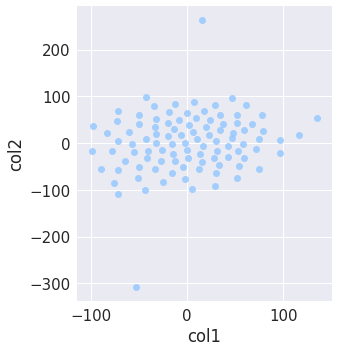

In [36]:
sns.lmplot('col1', 'col2',
           data=tsne_mod_df,
           fit_reg=False,
          scatter=True)

In [37]:
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
sel1 = sel.fit_transform(df3_scaled)

In [38]:
sel1.shape

(100, 171)

In [ ]:
df3_scaled.columns

In [ ]:
y_corr = np.corrcoef(npa_scaled, rowvar=False)

In [ ]:
np.corrcoef(npa_scaled.T)

In [ ]:
y_corr

In [ ]:
sns.pairplot(df3_scaled)

In [49]:
corrmat = df3_scaled.corr()

In [45]:
df3_scaled.isnull().any()

new_cust_n                        False
CUST_TIME_WITH_BANK               False
CUST_STAFF_FLAG                   False
CUST_CREDIT_BUREAU_SCORE_Min      False
CUST_AGE_OF_CUSTOMER              False
CUST_CRG_2_MONTHS_AGO_Mean        False
CUST_TOTAL_EXP_MTHLY_INCOM_Sum    False
CUST_TOTAL_INTEREST_INCOME_Sum    False
CUST_TOT_FEE_INCOME_Sum           False
CA_CURRENT_DAYS_IN_EXCESS_Max     False
CA_DAYS_IN_DEBIT_L3M_Max          False
CA_DAYS_IN_DEBIT_L6M_Max          False
CA_DAYS_IN_EXCESS_L3M_Max         False
CA_DAYS_IN_EXCESS_L6M_Max         False
CA_MIN_BAL_L3M_L6M_PERCENT_Max    False
CA_MINBAL_L3M_TO_MINBAL_L1_Max    False
CA_MNTH_SIN_ACCT_OPEN_Max         False
CA_MNTH_SIN_LAST_ACTIVE_Max       False
CA_MNTH_SIN_LAST_LIM_CHN_Max      False
CA_ODRFT_UTI_PER_MINBAL_L1_Max    False
CA_DELPHI_SCORE_Max               False
CA_MIN_BAL_L3M_L6M_PERCENT_Min    False
CA_MINBAL_L3M_TO_MINBAL_L1_Min    False
CA_MNTH_SIN_ACCT_OPEN_Min         False
CA_MNTH_SIN_LAST_ACTIVE_Min       False


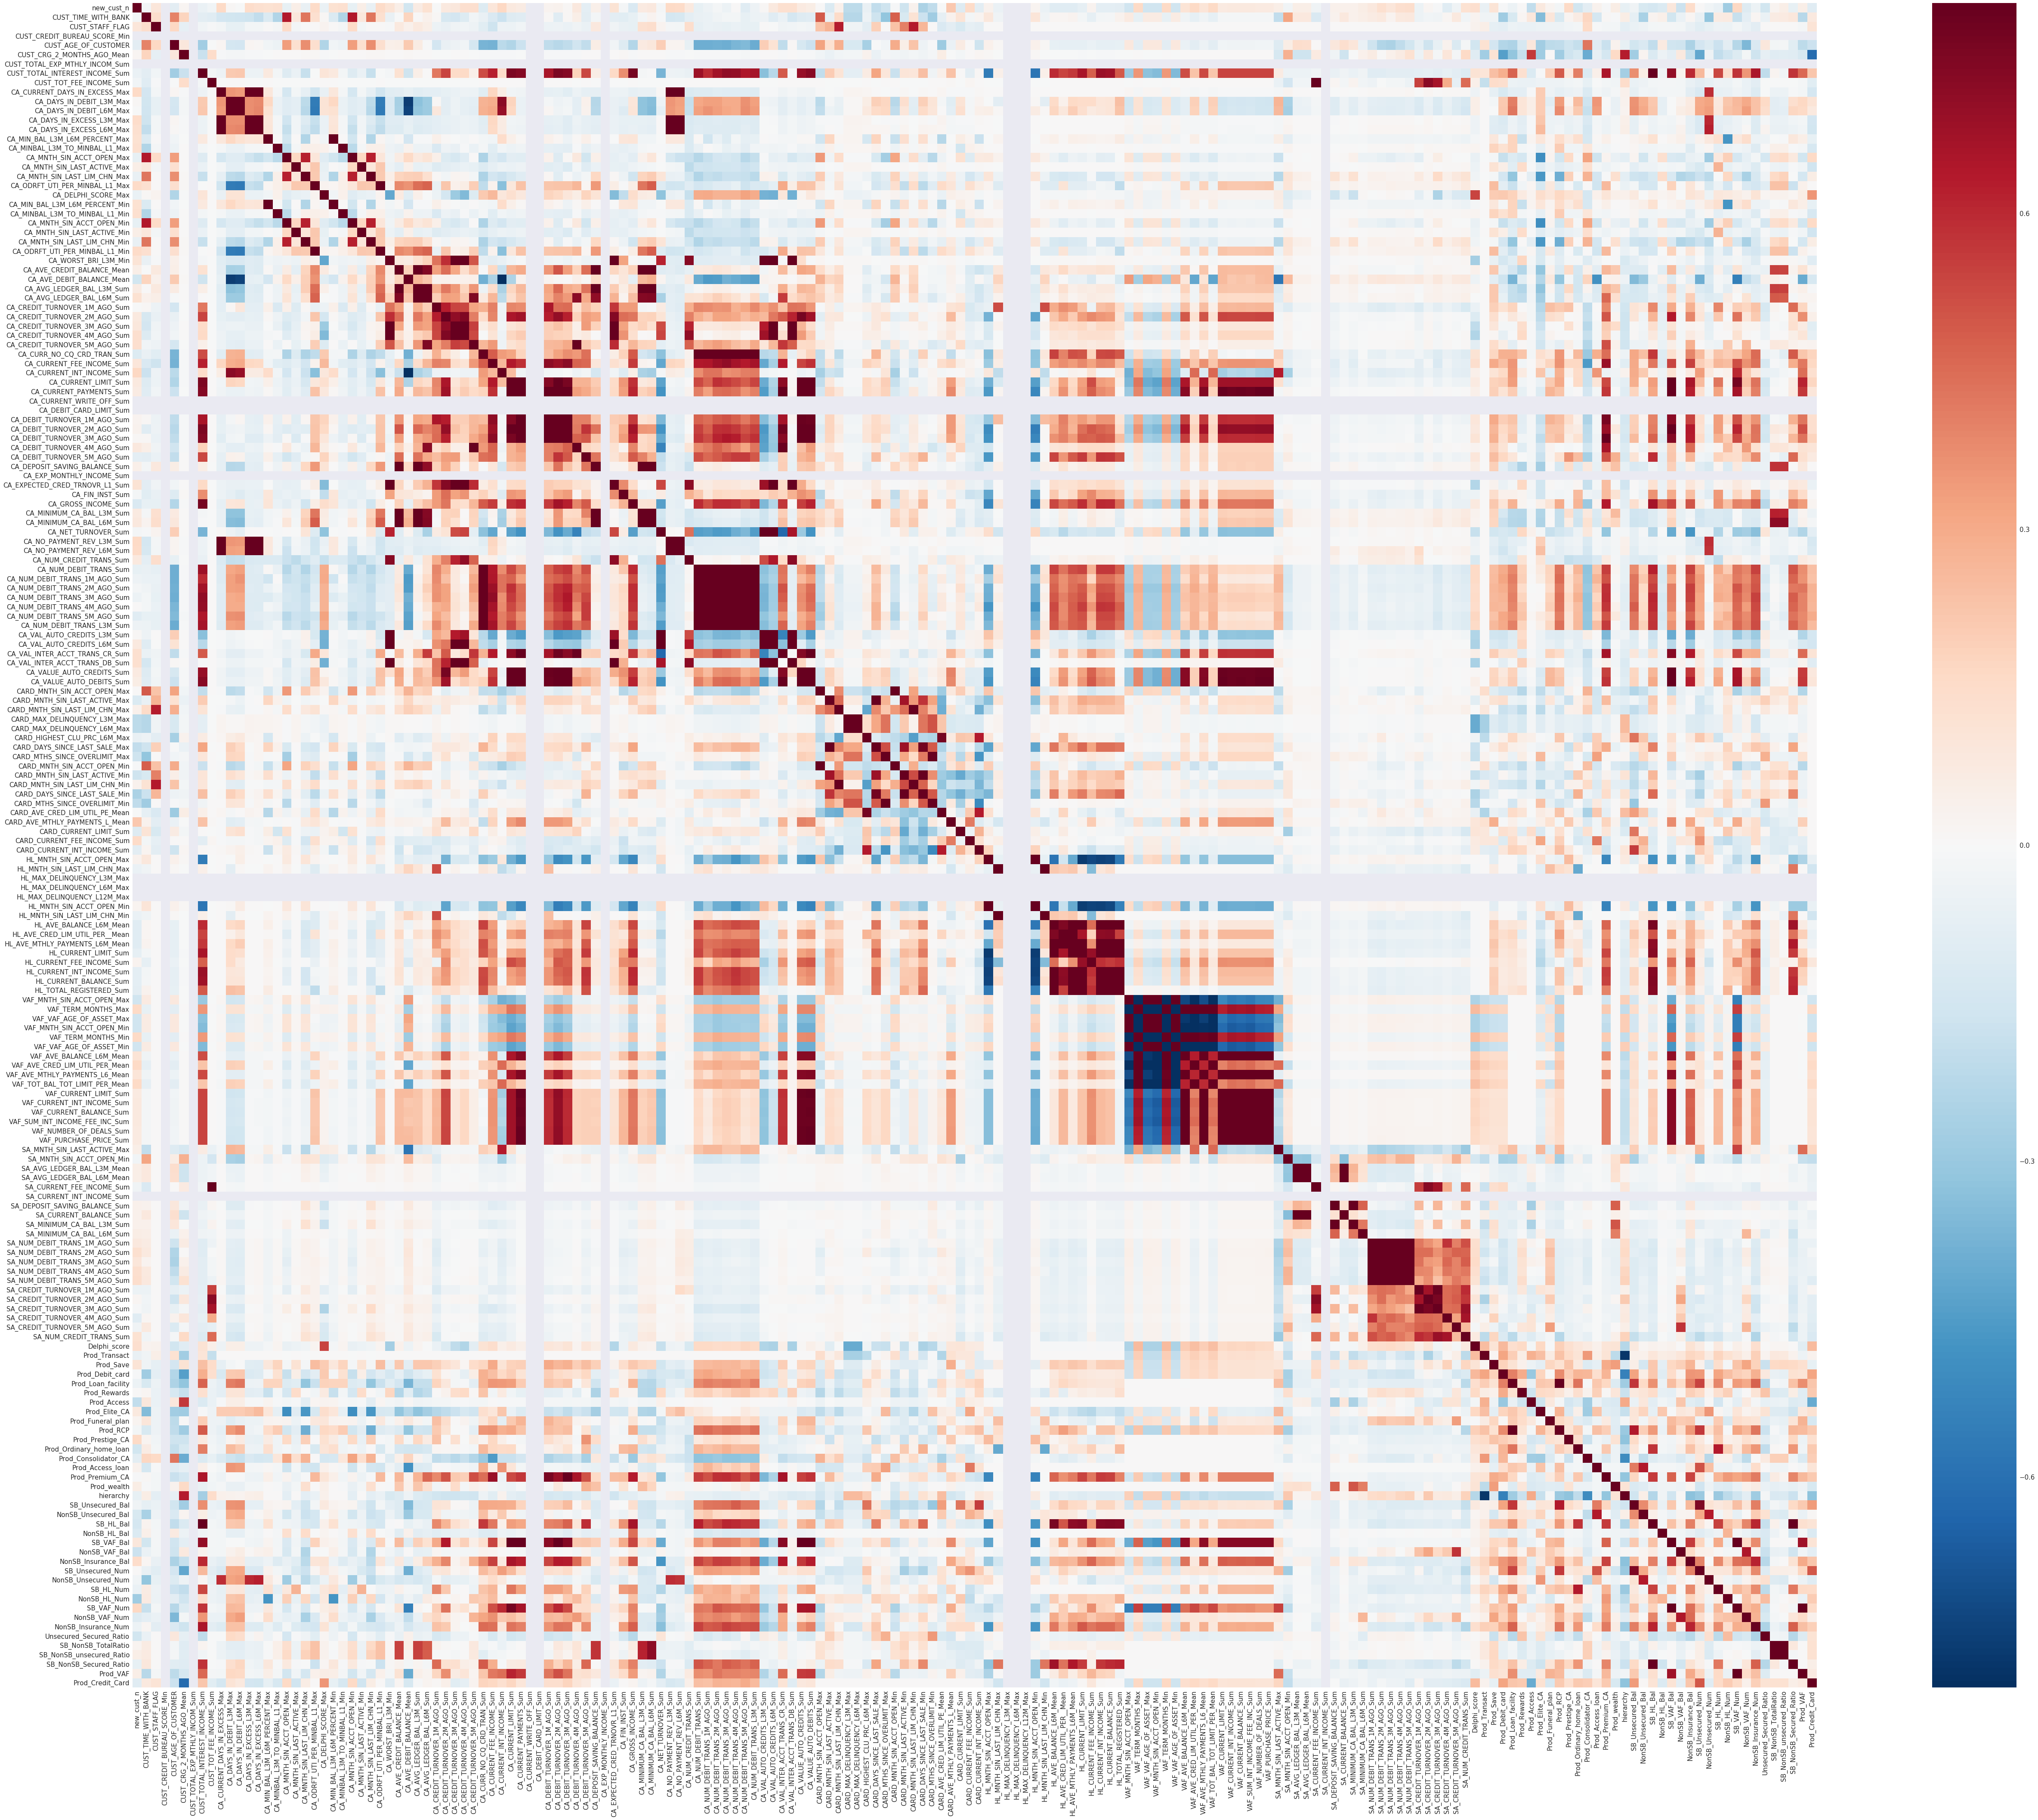

In [53]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(96, 72))
# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=.8, vmin=-0.8, square=True)